# **Exercise 1.** C. Soneira

## Question. **Use several of the tests that we have seen to compare those three distributions of data, with the aim of answering the following questions:**
- Do they have the same mean?
- Do they have the same variance?
- Are they compatible with being the same distribution?

## **Introduction**

### The tests

![Scheme](ss2.png)

### Hypothesis tests, p-values and confidence intervals

The fundamental procedure we follow when doing parametric hypothesis tests is the following:
1. Assume some distribution for the obtained data.
2. Given that distribution, calculate the distribution of some statistic we are interested in. For the Student's t, for example, the statistic is the difference of means, $\mu_{1}-\mu_{2}$; for Snédecor's F, for example, it is interesting to use the ratio of sample variances.
3. We calculate the actual value for the statistic given some sample.
4. Since we know the distribution of the statistic, we can assign this value we obtained for the sample to a certain probability. That probability, gathered in the p-value, *is the probability of obtaining test results at least as extreme as the result actually observed* ([source](https://en.wikipedia.org/wiki/P-value)). In other words, given a value for the statistic and assuming the null hyothesis, **the p-value is the probability to obtain, given those circumstances, that exact value for the statistic**. In conclusion: if the p-value is too low, we suspect that the statistic unlukely behaves as the null hypothesis presents.

For non parametric hypothesis, the scheme is similar, with the difference that we might not know the initial distributions, maybe only the one dictated by the null hypothesis. The development is similar, though: creating a statistic with known distribution to guess the probability of obtaining the value that we actually get from the sample.

The confidence interval is just the interval of values that the statistic could take in which we will not be sure that the probability of it being there allows accepting the alternative hypothesis.

### An important remark

Even though the p-value is, in the end, the most key value to determine if a test allows rejecting or not the null hypothesis, is even more important to know the assumptions we have to make to apply each one of the tests. Not only because some of them assume equal variances, but even equal, gaussian distributions, which, we will see, it is a tremendous assumption given this data. **In summary, the p-value is important, but not more than the adequacy of the test to each one of the samples.**

## **Results**

Let's start importing the data; we get the dataframes as:

In [1]:
# We don't want unavoidable warnings showing up.
options(warn=-1)

d1<-read.csv("dat1.dat")
d2<-read.csv("dat2.dat")
d3<-read.csv("dat3.dat")

v1<-d1[,1]
v2<-d2[,1]
v3<-d3[,1]

And we can plot an histogram just to make an idea of the shape of the data:

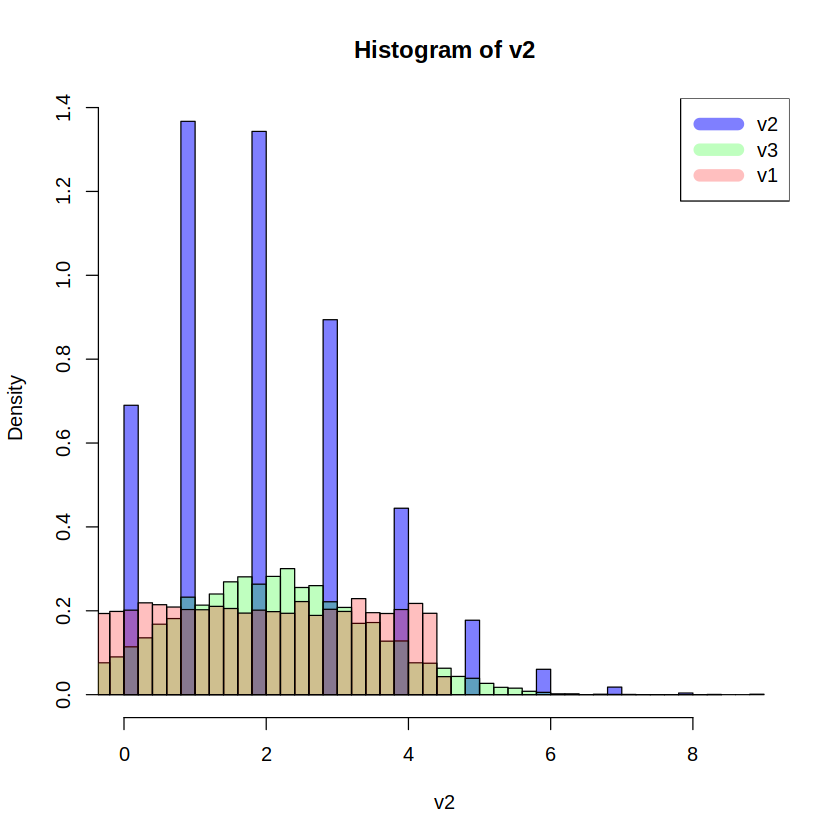

In [2]:
hist(v2,breaks=33,freq=FALSE,col=rgb(0,0,1,1/2))
hist(v3,breaks=60,add=TRUE,freq=FALSE,col=rgb(0,1,0,1/4))
hist(v1,breaks=20,freq=FALSE,add=TRUE,col=rgb(1,0,0,1/4))
legend("topright",c("v2", "v3","v1"),col=c(col=rgb(0,0,1,1/2),rgb(0,1,0,1/4),rgb(1,0,0,1/4)),lw=10)

By sight we can sense that they are different distributions. Let's justify this hunch with a formal study.

First, we can calculate the ranks:

In [3]:
r12 <- c(v1,v2)
r1a <- rank(r12)[1:9999]
r2a <- rank(r12)[10000:19998]

r13 <- c(v1,v3)
r1b <- rank(r13)[1:9999]
r3b <- rank(r13)[10000:19998]

r23 <- c(v2,v3)
r2c <- rank(r23)[1:9999]
r3c <- rank(r23)[10000:19998]

## **Do they have the same mean?**

If we are assuming Gaussian distributions, then we can apply:

### *Students t*

In [4]:
conf = 0.99
t.test(v1,v2,conf.level=conf)
t.test(v1,v3,conf.level=conf)
t.test(v2,v3,conf.level=conf)


	Welch Two Sample t-test

data:  v1 and v2
t = -0.0037615, df = 19996, p-value = 0.997
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.05162102  0.05147049
sample estimates:
mean of x mean of y 
 1.986223  1.986299 



	Welch Two Sample t-test

data:  v1 and v3
t = -0.017841, df = 19996, p-value = 0.9858
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.05189765  0.05118375
sample estimates:
mean of x mean of y 
 1.986223  1.986580 



	Welch Two Sample t-test

data:  v2 and v3
t = -0.014079, df = 19996, p-value = 0.9888
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.05182276  0.05125940
sample estimates:
mean of x mean of y 
 1.986299  1.986580 


Close to 1 p-values show that, given the null hypothesis $H_{0}=$"difference of means is 0", the probability of obtaining this $t$ statistic is almost the total. Also the $t$-values are always inside the confidence interval; thus, in the three cases we cannot reject with a 99% probability the nule hypothesis.

If we are assuming general/non-parametric distributions then we can apply:

### *Test of the sum of the ranks, or t-test with ranks, or U test*

In [5]:
wilcox.test(v1,v2)
wilcox.test(v1,v3)
wilcox.test(v2,v3)


	Wilcoxon rank sum test with continuity correction

data:  v1 and v2
W = 51050951, p-value = 0.009131
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  v1 and v3
W = 49911677, p-value = 0.8478
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  v2 and v3
W = 48285083, p-value = 2.795e-05
alternative hypothesis: true location shift is not equal to 0


The p-values are very low for 1-2 and 2-3, so we can reject with more than 99% significance the null hypothesis of the means beaing equal. For the 1-3 case we have a much larger p-value, so we can not reject the null hypothesis.

### *Z test for the mean*

In [7]:
library(BSDA)
library(lattice)

z.test(v1, v2, alternative = "two.sided", mu = 0, sigma.x = sd(v1), sigma.y = sd(v2), conf.level = 0.99)
z.test(v2, v3, alternative = "two.sided", mu = 0, sigma.x = sd(v2), sigma.y = sd(v3), conf.level = 0.99)
z.test(v1, v3, alternative = "two.sided", mu = 0, sigma.x = sd(v1), sigma.y = sd(v3), conf.level = 0.99)


	Two-sample z-Test

data:  v1 and v2
z = -0.0037615, p-value = 0.997
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.05161610  0.05146557
sample estimates:
mean of x mean of y 
 1.986223  1.986299 



	Two-sample z-Test

data:  v2 and v3
z = -0.014079, p-value = 0.9888
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.05181784  0.05125448
sample estimates:
mean of x mean of y 
 1.986299  1.986580 



	Two-sample z-Test

data:  v1 and v3
z = -0.017841, p-value = 0.9858
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -0.05189273  0.05117883
sample estimates:
mean of x mean of y 
 1.986223  1.986580 


Z-test also shows similar results for the mean: the near 1 p-value indicates that we cannot reject the null hypothesis.

## **Do they have the same variance?**

If we are assuming Gaussian distributions, then we can apply:

### *F test for variances*

In [8]:
conf<-0.99
var.test(v1, v2, alternative = "two.sided",conf.level=conf)
var.test(v1, v3, alternative = "two.sided",conf.level=conf)
var.test(v2, v3, alternative = "two.sided",conf.level=conf)


	F test to compare two variances

data:  v1 and v2
F = 0.99997, num df = 9998, denom df = 9998, p-value = 0.9988
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.9497512 1.0528455
sample estimates:
ratio of variances 
         0.9999707 



	F test to compare two variances

data:  v1 and v3
F = 1.0004, num df = 9998, denom df = 9998, p-value = 0.9855
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.9501242 1.0532590
sample estimates:
ratio of variances 
          1.000363 



	F test to compare two variances

data:  v2 and v3
F = 1.0004, num df = 9998, denom df = 9998, p-value = 0.9843
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.9501521 1.0532899
sample estimates:
ratio of variances 
          1.000393 


The F test also gives near-1 p-values, not allowing to reject the null hypothesis in favor of the alternative. The variances, then, cannot be told to being different regarding to this test.

If we are assuming general distributions then we can apply:

### *Z test (handmade)*

In [9]:
library(pracma)

zfun <- function(a,b) {
    cat("_____Equal variances with Z-test____\n")
    sa=sd(a)
    
    na=length(a)
    sb=sd(b)
    
    nb=length(b)
    sd=sqrt((1/na+1/nb)*(1/na+nb-2)*(sum((a-mean(a))**2+(b-mean(b))**2)))
    
    z<-(sa-sb)/(sd/sqrt(2))
    cat("Z =",z,"\n")
    
    ph0 <- erfc(z)
    cat("p-value = ",ph0,"\n\n")
}

zfun(v1,v2)
zfun(v1,v3)
zfun(v2,v3)

_____Equal variances with Z-test____
Z = -1.037332e-07 
p-value =  1 

_____Equal variances with Z-test____
Z = 1.284738e-06 
p-value =  0.9999986 

_____Equal variances with Z-test____
Z = 1.388471e-06 
p-value =  0.9999984 



Again, high p-values do not allow to reject the null hypothesis with any level of confidence.

### *F test with ranks*

In [10]:
var.test(r1a, r2a, alternative = "two.sided",conf.level=conf)
var.test(r1b, r3b, alternative = "two.sided",conf.level=conf)
var.test(r2c, r3c, alternative = "two.sided",conf.level=conf)


	F test to compare two variances

data:  r1a and r2a
F = 1.2412, num df = 9998, denom df = 9998, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 1.178870 1.306835
sample estimates:
ratio of variances 
          1.241205 



	F test to compare two variances

data:  r1b and r3b
F = 1.1661, num df = 9998, denom df = 9998, p-value = 1.643e-14
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 1.107492 1.227709
sample estimates:
ratio of variances 
          1.166052 



	F test to compare two variances

data:  r2c and r3c
F = 0.95366, num df = 9998, denom df = 9998, p-value = 0.0177
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.9057678 1.0040878
sample estimates:
ratio of variances 
         0.9536616 


For the ranks, the p-values are really small, being the highest the case 2-3. In the 1-3 and 1-2 cases we can reject the null hypothesis, but for the 2-3 case we have to accept it with a 99% confidence level.

## **Are they compatible with being the same distribution?**

### Assuming Gaussian statistics:

### $\chi^{2}$ *test*

In [11]:
# We choose a number of bins similar to the one used on the histograms.
brs <- 20

c1 <- cut(v1,breaks = brs)
c2 <- cut(v2,breaks = brs)
c3 <- cut(v3,breaks = brs)

t1 <- as.numeric(table(c1))
t2 <- as.numeric(table(c2))
t3 <- as.numeric(table(c3))

chisq.test(t1,t2)
chisq.test(t2,t3)
chisq.test(t1,t3)


	Pearson's Chi-squared test

data:  t1 and t2
X-squared = 149, df = 150, p-value = 0.5077



	Pearson's Chi-squared test

data:  t2 and t3
X-squared = 172, df = 170, p-value = 0.4427



	Pearson's Chi-squared test

data:  t1 and t3
X-squared = 273.33, df = 255, p-value = 0.2054


The p-values are far from 1: in the best case we have a probability of aproximately 1/2. Thus, we do not have the confidence enough (not even of 0.5) to not reject the alternative hypothesis. We conclude, then, than according to this $\chi^{2}$ test the three datasets do not come from the same distribution.

Assuming non Gaussian, but general statistics:

### *Kolmogorov-Smirnov test*

In [12]:
ks.test(v1,v2)
ks.test(v1,v3)
ks.test(v2,v3)


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  v1 and v2
D = 0.17622, p-value < 2.2e-16
alternative hypothesis: two-sided



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  v1 and v3
D = 0.061706, p-value < 2.2e-16
alternative hypothesis: two-sided



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  v2 and v3
D = 0.18042, p-value < 2.2e-16
alternative hypothesis: two-sided


In this case we have very small, nearly zero p-values, meaning that with almost total probability we can reject the null hypothesis and accept the alternative: the distributions that follow these datasets are different from each other.

## **Conclusions**

We have showed various methods to do hypothesis tests according to different assumptions. We have showed the robustness of methods involving ranks, as well as the contradictory information that bring several tests (such as F tests) when applied to non gaussian samples: as we said in the introduction, it is key to select the adequate method given some sample.

## **Bibliography**

- [On the ANOVA](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/aov)
- [P-value](https://en.wikipedia.org/wiki/P-value)
- [Binning values](https://stackoverflow.com/questions/32292542/binning-values-in-a-vector)
- [Number of bins](https://stats.stackexchange.com/questions/320215/how-do-you-choose-the-number-of-bins-to-use-for-a-chi-squared-gof-test)
- [Tables and data](https://statisticsglobe.com/extract-values-and-names-from-table-object-in-r)
- [ANOVA by Joaquín Amat Rodrigo](https://www.cienciadedatos.net/documentos/19_anova)
- [F test for general distributions](https://statsandr.com/blog/fisher-s-exact-test-in-r-independence-test-for-a-small-sample/)
- [On pracma package](https://www.rdocumentation.org/packages/pracma/versions/1.9.9)
- [Transposing dataframes](https://www.dataanalytics.org.uk/rotating-or-transposing-r-objects/)
- [BDSA package](https://www.rdocumentation.org/packages/BSDA/versions/1.2.1/topics/z.test)
- [Z test in R](https://www.rdocumentation.org/packages/BSDA/versions/1.2.1/topics/z.test)
- [Images in markdown](https://medium.com/markdown-monster-blog/getting-images-into-markdown-documents-and-weblog-posts-with-markdown-monster-9ec6f353d8ec)

## **Addendum**
Scheme used in the beggining (made by me):

We will use some of the several tests reviewed in the course in order to statistically compare the different datasets that we are given. We will present a simple scheme that we will follow throughout the calculations with a simple explanation on what are the hypothesis and theoretical basis of these methods.  
- Parametric comparison  
    - Mean comparison  
        - Assuming Gaussian distributions  
            - **Students' t**: same variance or different variance  
        - General distributions  
            - **Test of the sum of the ranks, or t-test with ranks, or U test**: requires large samples  
            - **Z test**: requires large samples  
    - Variance comparison  
        - Assuming Gaussian distributions  
            - **F test**  
        - General distributions  
            - **Z test**: requires large samples  
            - **F test with ranks**: requires large samples  
- Non parametric comparison  
    - Distribution comparison  
        - Assuming Gaussian distributions  
            - $\chi^{2}$ **test**: requires binned data  
        - General distributions  
            - $\chi^{2}$ **test**: requires binned data and very large samples  
            - **Kolmogorov-Smirnov**: used for unbinned data  